# Token Embedding

- Algorithm 1

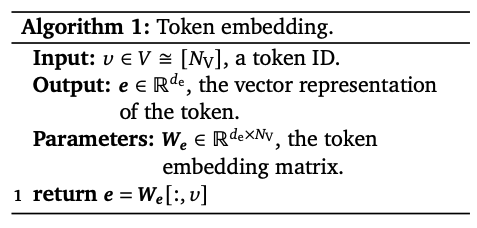


In Algorithm 1, token embedding gets an input $v$, which represents a token ID.  
And its output is $e$, the vector representation of the token mapped by $W_{e}$, the token embedding matrix.

## Token Embedding Matrix

Before implementing Algorithm 1 we need to make $W_{e}$, the token embedding matrix.  
$W_{e}$ needs a two argument from its defintion:
$$
W_{e}\in\mathbb{R}^{d_{e} \times N_{V}}
$$
- $d_{e}$ : dimension of embedding vector
- $N_{V}$ : number of vocabulary

In [ ]:
def generate_token_embedding_matrix(d, v):
    embed_matrix = {i: [i]*d for i in range(v)}
    return embed_matrix

In [ ]:
embed_dimension = 10
num_vocab = 3
embed_matrix = generate_token_embedding_matrix(embed_dimension, num_vocab)
embed_matrix

{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 2: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]}

## Embed token to vector
Define a function that implements algorithm 1.  
Function has two arguments, `token_id` and `embed_matrix`.

In [ ]:
def token_embedding(token_id, embed_matrix):
    output_vector = embed_matrix[token_id]
    return output_vector

In [ ]:
sample_token_id = 1
sample_output_vector = token_embedding(sample_token_id, embed_matrix)
sample_output_vector

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## In sentence

But in practical, we are not mapping only a token.
We should map all tokens in sentence.

Input sample will looks like below:

```
sample_sentence = [0, 1, 2, 3, ...]
len(sample_sentence)
# n
```

* `n`: length of sentence

In [ ]:
sample_sentence = [0, 1, 2]
len(sample_sentence)

3

Define a function that implements mapping to all tokens in sentence.  
Use `token_embedding` that we have defined before.

In [ ]:
def sentence_token_embedding(sentence, embed_matrix):
    embed_sentence = []
    for token_id in sentence:
        embed_vector = token_embedding(token_id, embed_matrix)
        embed_sentence.append(embed_vector)
    return embed_sentence

Embedded sentence should be looks like below:

```
embed_sentence = mapping(sentence, embed)
embed_sentence
# [
#     [0.xxx, 0.xxx, 0.xxx, ...],
#     [0.xxx, 0.xxx, 0.xxx, ...],
#     [0.xxx, 0.xxx, 0.xxx, ...],
#     ...
# ]
```

In [ ]:
embed_token_sentence = sentence_token_embedding(sample_sentence, embed_matrix)
embed_token_sentence

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]

Length of `embed_sentence` is `n` same as length of sentence.

In [ ]:
len(embed_token_sentence)

3

Dimension of embeded vector is `d`, which is given parameter.

In [ ]:
len(embed_token_sentence[0])

10

# Positional Embedding

- Algorithm 2

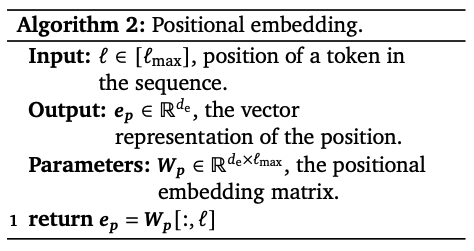


In Algorithm 2, positional embedding gets an input $l$, which reprensents position of a token in the sequence.  
And its ouput is $e_{p}$, the vector representation of the position mapped by $W_{p}$, the positional embedding matrix.

## Postional Embedding Matrix
Before implementing Algorithm 2 we need to make $W_{p}$, the positional embedding matrix.
$W_{p}$ needs a two argument from its defintion:
$$
W_{p}\in\mathbb{R}^{d_{e} \times l_{max}}
$$
- $d_{e}$ : dimension of embedding vector
- $l_{max}$ : maximal context length

Definition of $l_{max}$:

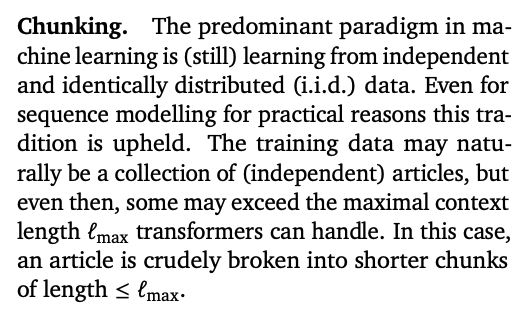

### Hardcoded Embedding Matrix
In this tutorial `positional_embedding_matrix` implements original tranformer methods.

> Not all transformers make use of learned positional embeddings, some use a hard-coded mapping.  
> Such hardcoded positional embeddings can (theoretically) handle arbitrarily long sequences.  
> The original [Transformer](https://arxiv.org/abs/1706.03762) uses:  
>$$
>W_{p}[2i-1,t] = \sin({t/l^{2i/d_{e}}_{max}})
>$$
>$$
>W_{p}[2i,t] = \cos({t/l^{2i/d_{e}}_{max}})
>$$
> for $0 < i \le d_{e}/2$.

* $t$ represents the position of token

For example, assume that we have embedding vector with 10 dimension.  
Comparing with paper's notation, $d_{e}=10 \rightarrow 0 < i \le 5$.

And also assume that $l_{max}=5$.  
Implementing positional_embedding_matrix expression above eash can Calculated like this:

- $i=1 \rightarrow W_{p}[1,t]=\sin(t/5^{2/10}), W_{p}[2,t]=\cos(t/5^{2/10})$
- $i=2 \rightarrow W_{p}[3,t]=\sin(t/5^{4/10}), W_{p}[4,t]=\cos(t/5^{4/10})$
- $i=3 \rightarrow W_{p}[5,t]=\sin(t/5^{6/10}), W_{p}[6,t]=\cos(t/5^{6/10})$
- $i=4 \rightarrow W_{p}[7,t]=\sin(t/5^{8/10}), W_{p}[8,t]=\cos(t/5^{8/10})$
- $i=5 \rightarrow W_{p}[9,t]=\sin(t/5^{10/10}), W_{p}[10,t]=\cos(t/5^{10/10})$

In this tutorial we assume that position $t$ has range $0\le t < l_{max}$.  
So it takes only two arguments `d` and `l_max`.

In [ ]:
def generate_positional_embedding_matrix(d, l_max):
    from math import sin, cos

    pos_matrix = {}
    for t in range(l_max):
        pos_vector = []
        for i in range(d):
            c = t / (l_max ** (i/d))
            if i % 2 == 0:
                v = sin(c)
            else:
                v = cos(c)
            pos_vector.append(v)
        pos_matrix[t] = pos_vector
    return pos_matrix

In [ ]:
l_max = 5
pos_matrix = generate_positional_embedding_matrix(embed_dimension, l_max)
pos_matrix

{0: [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
 1: [0.8414709848078965,
  0.6589758961876738,
  0.66297050495782,
  0.8155983039494298,
  0.5014773904169323,
  0.9016555951500453,
  0.3715990270406081,
  0.9479277461957519,
  0.2724572044052023,
  0.9725320837941663],
 2: [0.9092974268256817,
  -0.13150153648730423,
  0.9926597923765998,
  0.3304011868103727,
  0.8677271400921646,
  0.6259656245307648,
  0.6899801114404277,
  0.7971340240155157,
  0.5242991535310988,
  0.8916373080180467],
 3: [0.1411200080598672,
  -0.8322885819012287,
  0.8233301012265333,
  -0.27664900877859255,
  0.9999868910066393,
  0.22715522030946758,
  0.9095468305649883,
  0.5633231714062046,
  0.736470428811671,
  0.7617596945166576],
 4: [-0.7568024953079283,
  -0.9654146918029564,
  0.24010498558729074,
  -0.7816701115085943,
  0.8625916771558482,
  -0.21633407381161932,
  0.998854298357255,
  0.27084530448633765,
  0.8929172613168825,
  0.5900341780993384]}

# Embedding

Positonal embedding of a token is usually added to the token embedding to form a tokens's initial embeding.  
For the $t$-th token of a sequence $x$, the embedding is:
$$
e=W_{e}[:,x[t]]+W_{p}[:,x[t]]
$$

Define a function that adds embedding vector and positional vector when `position` and `token_id` is given.

In [ ]:
def embed_by_position(token_id, position, embed_matrix, pos_matrix):
    embed_vector = embed_matrix[token_id]
    pos_vector = pos_matrix[position]
    result_vector = []
    for e, p in zip(embed_vector, pos_vector):
        result_vector.append(e+p)
    return result_vector

In [ ]:
position = 0
token_id = 0
embed_vecotr = embed_by_position(token_id, position, embed_matrix, pos_matrix)
embed_vecotr

[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]

As explained before, in practical, we should map all tokens in sentence.  
Define a function that implements mapping to all tokens in sentence.  
Use `embed_by_position` that we have defined before.

In [ ]:
def sentence_embedding(sentence, embed_matrix, pos_matrix):
    embed_sentence = []
    for position, token_id in enumerate(sentence):
        token_vector = embed_by_position(token_id, position, embed_matrix, pos_matrix)
        embed_sentence.append(token_vector)
    return embed_sentence

In [ ]:
embed_sentence = sentence_embedding(sample_sentence, embed_matrix, pos_matrix)
embed_sentence

[[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
 [1.8414709848078965,
  1.6589758961876737,
  1.66297050495782,
  1.8155983039494297,
  1.5014773904169323,
  1.9016555951500453,
  1.3715990270406082,
  1.9479277461957518,
  1.2724572044052023,
  1.9725320837941664],
 [2.909297426825682,
  1.8684984635126958,
  2.9926597923765996,
  2.3304011868103727,
  2.8677271400921645,
  2.6259656245307648,
  2.689980111440428,
  2.7971340240155156,
  2.524299153531099,
  2.891637308018047]]